## ***Natual  Language Processing***

#**Introduction**
1.   The goal: Implement Text Classifier Model for newpapers in Vietnamese.
2.  Text Classification is an example of supervised machine learning task since a labelled dataset containing text documents and their labels is used for train a classifier. There are 4 steps that we need to do as follows: 
  *   Preprocessing Data: Data preparation, Feature Engineering
  *   Model training
  *   Improve Performance
  *   Model evaluation




# Preprocessing Data


##Data preparation

Data was clone in here: https://github.com/duyvuleo/VNTC

In [ ]:
!pip3 install vncorenlp

     |████████████████████████████████| 2.6 MB 8.6 MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645951 sha256=7c8da8d763b6be3f182c5cdc885d4a7d38e43bc76a64d738e463bd57ce9ab166
  Stored in directory: /root/.cache/pip/wheels/0c/d8/f2/d28d97379b4f6479bf51247c8dfd57fa00932fa7a74b6aab29
Successfully built vncorenlp


In [ ]:
!pip install gensim 

In [ ]:
# To perform word segmentation only
!wget 'https://github.com/vncorenlp/VnCoreNLP/archive/v1.1.1.zip' -O ./models.$$ && unzip -o ./models.$$ && rm -r ./models.$$.

--2021-10-13 07:26:47--  https://github.com/vncorenlp/VnCoreNLP/archive/v1.1.1.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/vncorenlp/VnCoreNLP/zip/v1.1.1 [following]
--2021-10-13 07:26:48--  https://codeload.github.com/vncorenlp/VnCoreNLP/zip/v1.1.1
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘./models.265’

./models.265            [                <=> ] 137.29M  26.2MB/s    in 6.2s    

2021-10-13 07:26:54 (22.1 MB/s) - ‘./models.265’ saved [143955573]

Archive:  ./models.265
3b5c2aac53bb1fda0502d89ab8085b712e299fab
   creating: VnCoreNLP-1.1.1/
  inflating: VnCoreNLP-1.1.1/LICENSE.md  
  inflating: VnCoreNLP-1.1.

In [ ]:
import numpy as np
import gensim
import os
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
from vncorenlp import VnCoreNLP 
VNCOREDIR='/content/VnCoreNLP-1.1.1/VnCoreNLP-1.1.1.jar'
ANNOTATOR=VnCoreNLP(VNCOREDIR,port=9000,annotators='wseg',quiet=False)

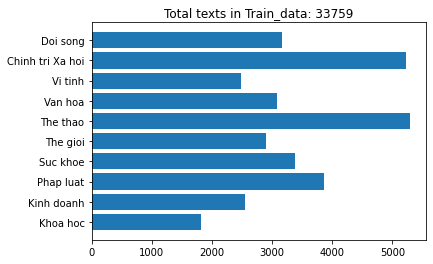

In [ ]:
file_path='/content/drive/MyDrive/Data_VietnamNews/Train_Full'
labels=[]
count_file=[]
for label in os.listdir(file_path):
  files=os.listdir(os.path.join(file_path,label))
  count_file.append(len(files))
  labels.append(label)
#Statisfical train data
y_pos=np.arange(len(labels))
plt.barh(y_pos,count_file,align='center')
plt.yticks(y_pos,labels=labels)
plt.title('Total texts in Train_data: %d' %(sum(count_file)))
plt.show()

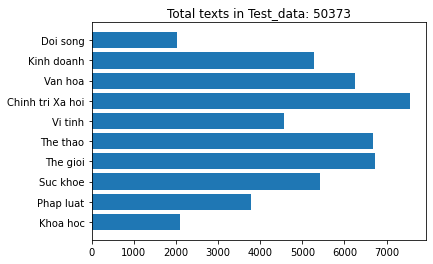

In [ ]:
file_path='/content/drive/MyDrive/Data_VietnamNews/Test_Full'
labels=[]
count_file=[]
for label in os.listdir(file_path):
  files=os.listdir(os.path.join(file_path,label))
  count_file.append(len(files))
  labels.append(label)
#Statisfical train data
y_pos=np.arange(len(labels))
plt.barh(y_pos,count_file,align='center')
plt.yticks(y_pos,labels=labels)
plt.title('Total texts in Test_data: %d' %(sum(count_file)))
plt.show()

In [ ]:
def normalization_text(text):
  text = gensim.utils.simple_preprocess(text)
  return ' '.join(text)

In [ ]:
def vietnamese_tokenize(text):
    words = ANNOTATOR.tokenize(text)
    list_word=[]
    for word in words:
        list_word += word
    return ' '.join(list_word)

In [ ]:
#Remove stopwords from corpus

#Create list stopword
file_path='/content/drive/MyDrive/DataTextClassification_VietnamNews/vietnamese-stopwords-dash.txt'
dic_stopwords=[]
with open(file_path,'r',encoding='utf-8') as f:
  lines = f.readlines()
for word in lines:
  word=word[:-1]
  dic_stopwords.append(word)
dic_stopwords

#Remove
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in dic_stopwords:
            words.append(word)
    return ' '.join(words)

In [ ]:
#Create function to read txt 
def get_txt(file_path):
  with open(file_path,'r',encoding='utf-16') as f:
    lines = f.readlines()
    lines = ' '.join(lines)
    lines = normalization_text(lines)
    lines = vietnamese_tokenize(lines)
    lines = remove_stopwords(lines)
  return lines

In [ ]:
#Read 1 sample in train data
features=[]
labels=[]
file_path='/content/drive/MyDrive/Data_VietnamNews/Train_Full'
label = os.listdir(file_path)[0]
file=os.listdir(os.path.join(file_path,label))[0]
features.append(get_txt(os.path.join(file_path,label,file)))
features

['nhà_khoa_học nhiễm hố chôn gà dịch kiến phản_ánh người_dân nhiễm chôn gà chết tp hcm hố chôn dịch trào thoát khí nặng_mùi hôm trời nóng_bức vnexpress trao_đổi nhà_khoa_học quản_lý môi_trường giáo_sư tiến_sĩ tưởng thị hội_giảng_viên viện khoa_học công_nghệ môi_trường đh bách_khoa hà_nội động_vật chôn sâu đất phân_huỷ dạng hiếu_khí yếm_khí hợp_chất dạng lỏng thể khí_các dịch lỏng phát_sinh ngấm đất nhiễm xảy nghĩa_trang văn điển hà_nội khí thành phân_huỷ chất_hữu_cơ ch nh co thoát môi_trường mùi hôi độc_hại môi_trường sống giáo_sư nguyễn_công mẫn phó chủ_tịch viện địa kỹ_thuật liên_hiệp hội khoa_học_kỹ_thuật việt_nam chất_hữu_cơ phân_huỷ bãi chôn lấp rác chứa hợp_chất hữu_cơ canxi xương hố chôn gà chết dịch chứa vi_trùng bệnh biện_pháp thích_hợp thông_thường hố chôn lấp đường thoát rác ngấm đất phát_tán môi_trường xung_quanh khả_năng nguy_cơ nhiễm nước_ngầm tuỳ_thuộc tính_chất địa_tầng kiểm_tra xét_nghiệm kết_quả chính_xác đoàn thị trưởng phòng quản_lý môi_trường sở tài_nguyên môi_trườ

GetData


In [ ]:
#Loading text to list
def get_data(file_path):
  labels=[]
  features=[]
  for label in tqdm(os.listdir(file_path)):
    files=os.listdir(os.path.join(file_path,label))
    for file_name in files:
      features.append(get_txt(os.path.join(file_path,label,file_name)))
      labels.append(label)
  return features,labels

In [ ]:
# Reading train data
x,y=get_data('/content/drive/MyDrive/Data_VietnamNews/Train_Full')
print(x[0])
print(y[0])

100%|██████████| 10/10 [13:12<00:00, 79.25s/it]

nhà_khoa_học nhiễm hố chôn gà dịch kiến phản_ánh người_dân nhiễm chôn gà chết tp hcm hố chôn dịch trào thoát khí nặng_mùi hôm trời nóng_bức vnexpress trao_đổi nhà_khoa_học quản_lý môi_trường giáo_sư tiến_sĩ tưởng thị hội_giảng_viên viện khoa_học công_nghệ môi_trường đh bách_khoa hà_nội động_vật chôn sâu đất phân_huỷ dạng hiếu_khí yếm_khí hợp_chất dạng lỏng thể khí_các dịch lỏng phát_sinh ngấm đất nhiễm xảy nghĩa_trang văn điển hà_nội khí thành phân_huỷ chất_hữu_cơ ch nh co thoát môi_trường mùi hôi độc_hại môi_trường sống giáo_sư nguyễn_công mẫn phó chủ_tịch viện địa kỹ_thuật liên_hiệp hội khoa_học_kỹ_thuật việt_nam chất_hữu_cơ phân_huỷ bãi chôn lấp rác chứa hợp_chất hữu_cơ canxi xương hố chôn gà chết dịch chứa vi_trùng bệnh biện_pháp thích_hợp thông_thường hố chôn lấp đường thoát rác ngấm đất phát_tán môi_trường xung_quanh khả_năng nguy_cơ nhiễm nước_ngầm tuỳ_thuộc tính_chất địa_tầng kiểm_tra xét_nghiệm kết_quả chính_xác đoàn thị trưởng phòng quản_lý môi_trường sở tài_nguyên môi_trường

Convert data to .pkl, make it convenient to use next time

In [ ]:
pickle.dump(x, open('/content/drive/MyDrive/Data_VietnamNews/X_data.pkl', 'wb'))
pickle.dump(y, open('/content/drive/MyDrive/Data_VietnamNews/Y_data.pkl', 'wb'))

In [ ]:
# Similar to test data
x_test,y_test=get_data('/content/drive/MyDrive/Data_VietnamNews/Test_Full')
pickle.dump(x_test, open('/content/drive/MyDrive/Data_VietnamNews/X_test.pkl', 'wb'))
pickle.dump(y_test, open('/content/drive/MyDrive/Data_VietnamNews/Y_test.pkl', 'wb'))

100%|██████████| 10/10 [20:39<00:00, 124.00s/it]


## Features Engineering
* Convert data type text to vectors

In [ ]:
import pickle
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_data = pickle.load(open('/content/drive/MyDrive/Data_VietnamNews/X_data.pkl', 'rb'))
Y_data = pickle.load(open('/content/drive/MyDrive/Data_VietnamNews/Y_data.pkl', 'rb'))

X_test = pickle.load(open('/content/drive/MyDrive/Data_VietnamNews/X_test.pkl', 'rb'))
Y_test = pickle.load(open('/content/drive/MyDrive/Data_VietnamNews/Y_test.pkl', 'rb'))

### Analyze data

In [ ]:
import collections
import matplotlib.pyplot as plt

In [ ]:
X_length_corpus=list(map(lambda x: len(x.split(' ')),X_data))

In [ ]:
X_length_corpus=np.array(X_length_corpus)

In [ ]:
occurrences = collections.Counter(X_length_corpus)

In [ ]:
np.array(list(occurrences.keys())).mean()

502.0406976744186

In [ ]:
occurrences

Counter({10: 1,
         12: 2,
         13: 3,
         15: 1,
         16: 5,
         17: 6,
         18: 12,
         19: 7,
         20: 15,
         21: 19,
         22: 19,
         23: 23,
         24: 30,
         25: 29,
         26: 41,
         27: 37,
         28: 40,
         29: 55,
         30: 54,
         31: 57,
         32: 48,
         33: 51,
         34: 56,
         35: 60,
         36: 74,
         37: 81,
         38: 81,
         39: 76,
         40: 63,
         41: 97,
         42: 100,
         43: 108,
         44: 98,
         45: 107,
         46: 112,
         47: 118,
         48: 108,
         49: 122,
         50: 112,
         51: 127,
         52: 120,
         53: 135,
         54: 148,
         55: 170,
         56: 172,
         57: 150,
         58: 161,
         59: 176,
         60: 162,
         61: 154,
         62: 184,
         63: 186,
         64: 162,
         65: 190,
         66: 191,
         67: 219,
         68: 190,
         69:

Nhận thấy có nhiều văn bản lớn hơn ~1000 kí tự lại rất ít nhưng xuất hiện ít lần, có vẻ ảnh hưởng gì đó. (Kết luận k ảnh hưởng gì tới kết quả)

In [ ]:
for index in range(len(X_length_corpus)):
  if X_length_corpus[index]>1000:
    index_greater_than_1000_words.append(index);

In [ ]:
index_greater_than_1000_words=[]
for i,corpus in enumerate(X_data):
  if (len(corpus.split(' '))<10):
    index_greater_than_1000_words.append(i);

In [ ]:
X_data[i]

'góc hẹp sát bàn góc cây_xanh nâng góc vườn um_tùm cảm_giác xanh mát hiện quy_hoạch phố chừa trống vai_trò sân tác_dụng thông_thoáng tổ_chức đường thoát hố_ga tuỳ trang_trí sân thông_thường sân hai khuất tầm chức_năng phụ đồng_hồ nước_máy bơm dụng_cụ vệ_sinh sàn lộ_thiên trang_trí cây_xanh góc vườn bồn hẹp tận_dụng vách quanh treo giỏ hoa bò leo tường cây_xanh bàn_ghế ngoài_trời hóng gió đơn_giản băng ghế chỗ trò_chuyện đọc sách_báo trang_trí chất_liệu ốp tường đá sỏi gỗ gốm mảng màu_sắc gợi_mở thiên_nhiên trang_trí chảy vách ốp đá giả thác đổ hồ cột đá phun tổng_hợp yếu_tố khéo diện_tích hẹp tham chi_tiết vật_liệu gây_rối chật_chội chính_yếu góc cảm_giác rộng_mở dễ_chịu ghế bàn sân hóng mát sỏi đá tre góc thiên_nhiên thu diện_tích hẹp băng ghế đá đi tường mảng đá_ong bình gốm góc vạt cây_xanh lu kỷ_niệm hiện_đại thú_vị chủ_nhân'

In [ ]:
for i in range(len(index_greater_than_1000_words)):
  np.delete(X_data,index_greater_than_1000_words)
  np.delete(Y_data,index_greater_than_1000_words)

In [ ]:
len(X_data)

33759

In [ ]:
len(Y_data)

33759

###Count mode

  >-Some way you can do:
* Count Vectorizer
* TF-IDF (Term Frequency — Inverse Document Frequency)
* Word Embedding
* ...

Thử giảm dictionary xuống 30000 từ vựng:
* với countvect giảm hiệu quả
* với tfidf: tăng hiệu quả với mô hình MultinomialNB, không ảnh hưởng SVM

Thử giảm dictionary xuống 50000 từ vựng(không ảnh hưởng nhiều)

Thử giảm dictionary xuống 20000 từ vựng(không ảnh hưởng nhiều)


---

Thử loại bỏ từ với tfidf:

* min_df=3 (tăng 1 xíu) 0.02% :))
* max_df=0.5 (vẫn thế)
* max_df=0.5,min_df=50 (co kha nang)
* min_df=10
---
Dùng n_gram: (1,2) tức là vocab sẽ có 1 từ hiện tại và 1 từ hiện tại + từ tiếp (rất khả quan)


* max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words".
* min_df is used for removing terms that appear too infrequently.

####Count Vectorizer (AKA One-Hot Encoding):
  * The idea is super simple. Create a vector that has as many dimensions as your corpora has unique words (dictionary). Each unique word has a unique dimension and will be represented by a 1 in that dimension with 0 everywhere else

In [ ]:
#Convert a collection of text documents to a matrix of token counts

####
#Create Count Vectorizer Object
vectorizer = CountVectorizer(encoding='utf-8',analyzer='word',min_df=10,max_features=20000,ngram_range=(1,2))
model=vectorizer.fit(X_data)
#Save model vectorizer
pickle.dump(model, open(os.path.join('/content/drive/MyDrive/Model_VietnameseNewsClassification', "vectorizer_model.pkl"), 'wb'))

#Transform data
X_data_countvec=vectorizer.transform(X_data)
X_test_countvec=vectorizer.transform(X_test)

In [ ]:
print(X_data_countvec.shape)
print(X_test_countvec.shape)

(33759, 20000)
(50373, 20000)


####TF-IDF (Term Frequency - Inverse Document Frequency):
* In simpler terms, words that occur a lot but everywhere should be given very little weighting or significance
* TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
* IDF(t) = log(Total number of documents / Number of documents with term t in it)
* tf-idf(t, d) = tf(t, d) * log(N/(df + 1))

With 3 level:
* Word
* N-gram
* Char

In [ ]:
#TF-IDF
####
# Create TF-IDF Object
vectorizer = TfidfVectorizer(encoding='utf-8',analyzer='word',min_df=10,max_features=20000,ngram_range=(1,2))
model=vectorizer.fit(X_data)
#Save model vectorized
pickle.dump(model, open(os.path.join('/content/drive/MyDrive/Model_VietnameseNewsClassification', "vectorizer_model_tfidf.pkl"), 'wb'))

#Transform data
X_data_tfidf=vectorizer.transform(X_data)
X_test_tfidf=vectorizer.transform(X_test)

In [ ]:
print(X_data_tfidf.shape)
print(X_test_tfidf.shape)

(33759, 20000)
(50373, 20000)


####Word Embedding
Detail: https://forum.machinelearningcoban.com/t/hoc-bieu-dien-ngon-ngu-cho-may-tinh/299
* CBOW
* Skip - gram

In [ ]:
# from gensim.models import KeyedVectors
# from gensim.test.utils import datapath
# from keras.preprocessing import sequence
# word2vec_model_path="/content/drive/MyDrive/DataTextClassification_VietnamNews/baomoi.vn.model.bin"
# #Load Model trained on Vietnamese Wiki
# w2v = KeyedVectors.load_word2vec_format(datapath(word2vec_model_path), binary=True,encoding='utf8')
# vocab = w2v.vocab
# wv=w2v

In [ ]:
# #To get intersect my vocab and model vocab
# def intersect_word2vec_data(X):
#   word2vec_data=[]
#   for x in X:
#     text = []
#     count=1
#     for word in x.split(" "):
#       if (word in vocab):
#         text.append(wv[word])
#     word2vec_data.append(text)
#   return word2vec_data

In [ ]:
# #Each word 
# X_data_w2v = intersect_word2vec_data(X_data)
# X_test_w2v = intersect_word2vec_data(X_test)

In [ ]:
# len(df_data[0][2])

400

##Encode label

In [ ]:
#Create LabeblEncoder Object
le = preprocessing.LabelEncoder()
le.fit(Y_data)

#Tranform label
Y_data = le.transform(Y_data)
Y_test = le.transform(Y_test)

In [ ]:
print(Y_data.shape)
print(Y_test.shape)

(33759,)
(50373,)


# Model Training
I apply:
  * Navie Bayes
  * Logistic Regression
  * SVM

Performance Measures:
* Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations
* Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
* Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class
* F1 score - F1 Score is the weighted average of Precision and Recall

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pickle
import os

In [ ]:
def train_model(classifier,X_train,Y_train):
  x_train, x_val, y_train, y_val = train_test_split(X_train,Y_train, test_size=0.2, random_state=42)
  classifier.fit(x_train, y_train)

  train_predictions = classifier.predict(x_train)
  train_accuracy=accuracy_score(train_predictions, y_train)

  y_predict = classifier.predict(x_val)
  accuracy=accuracy_score(y_val,y_predict)
  precision_micro=precision_score(y_val,y_predict,average='micro')
  precision_macro=precision_score(y_val,y_predict,average='macro')
  recall_micro=recall_score(y_val,y_predict,average='micro')
  recall_macro=recall_score(y_val,y_predict,average='macro')
  f1_micro=f1_score(y_val,y_predict,average='micro')
  f1_macro=f1_score(y_val,y_predict,average='macro')
  return classifier,train_accuracy,accuracy,precision_micro,precision_micro,recall_micro,recall_macro,f1_micro,f1_macro

In [ ]:
def makeTable1(score):
  value=[]
  for i in score:
    value.append("{:.3%}".format(i))
    
  print('------------------------------------')
  print('evaluation\t\tvalue')
  print('------------------------------------')
  print('train_accuracy\t\t',value[0],'\n')
  print('accuracy\t\t',value[1],'\n')
  print('precision_micro\t\t',value[2])
  print('precision_macro\t\t',value[3])
  print('recall_micro\t\t',value[4])
  print('recall_macro\t\t',value[5])
  print('f1_micro\t\t',value[6])
  print('f1_macro\t\t',value[7])
  print('------------------------------------')

In [ ]:
Model_path='/content/drive/MyDrive/Model_VietnameseNewsClassification'

##Train by countvector

In [ ]:
#MultinomialNB  alpha=0.009
scores=[]
classifier,train_accuracy,accuracy,precision_micro,precision_micro,recall_micro,recall_macro,f1_micro,f1_macro=train_model(MultinomialNB(alpha=0.009),X_data_countvec,Y_data)
pickle.dump(classifier, open(os.path.join(Model_path, "countvec_MultinomialNB_model.pkl"), 'wb'))
scores.append([train_accuracy,accuracy,precision_micro,precision_micro,recall_micro,recall_macro,f1_micro,f1_macro])
makeTable1(scores[0])

------------------------------------
evaluation		value
------------------------------------
train_accuracy		 91.247% 

accuracy		 88.655% 

precision_micro		 88.655%
precision_macro		 88.655%
recall_micro		 88.655%
recall_macro		 88.713%
f1_micro		 88.655%
f1_macro		 88.272%
------------------------------------


In [ ]:
#LogisticRegression
scores=[]
classifier,train_accuracy,accuracy,precision_micro,precision_micro,recall_micro,recall_macro,f1_micro,f1_macro=train_model(LogisticRegression(random_state=0),X_data_countvec,Y_data)
pickle.dump(classifier, open(os.path.join(Model_path, "countvec_LogisticRegression_model.pkl"), 'wb'))
scores.append([train_accuracy,accuracy,precision_micro,precision_micro,recall_micro,recall_macro,f1_micro,f1_macro])
makeTable1(scores[0])

------------------------------------
evaluation		value
------------------------------------
train_accuracy		 99.878% 

accuracy		 90.595% 

precision_micro		 90.595%
precision_macro		 90.595%
recall_micro		 90.595%
recall_macro		 90.221%
f1_micro		 90.595%
f1_macro		 90.426%
------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#SVM 
scores=[]
classifier,train_accuracy,accuracy,precision_micro,precision_micro,recall_micro,recall_macro,f1_micro,f1_macro=train_model(svm.LinearSVC(C=0.001),X_data_countvec,Y_data)
pickle.dump(classifier, open(os.path.join(Model_path, "countvec_SVM_model.pkl"), 'wb'))
scores.append([train_accuracy,accuracy,precision_micro,precision_micro,recall_micro,recall_macro,f1_micro,f1_macro])
makeTable1(scores[0])

------------------------------------
evaluation		value
------------------------------------
train_accuracy		 99.874% 

accuracy		 89.603% 

precision_micro		 89.603%
precision_macro		 89.603%
recall_micro		 89.603%
recall_macro		 89.021%
f1_micro		 89.603%
f1_macro		 89.273%
------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


##Train by tfidf

In [ ]:
#MultinomialNB
scores=[]
classifier,train_accuracy,accuracy,precision_micro,precision_micro,recall_micro,recall_macro,f1_micro,f1_macro=train_model(MultinomialNB(alpha=0.004),X_data_tfidf,Y_data)
scores.append([train_accuracy,accuracy,precision_micro,precision_micro,recall_micro,recall_macro,f1_micro,f1_macro])
pickle.dump(classifier, open(os.path.join(Model_path, "tfidf_MultinomialNB_model.pkl"), 'wb'))
makeTable1(scores[0])

------------------------------------
evaluation		value
------------------------------------
train_accuracy		 93.602% 

accuracy		 89.336% 

precision_micro		 89.336%
precision_macro		 89.336%
recall_micro		 89.336%
recall_macro		 88.709%
f1_micro		 89.336%
f1_macro		 88.909%
------------------------------------


Train accuracy:  0.956574543084807

In [ ]:
#LogisticRegression
scores=[]
####random_state=0,C=5,tol=0.01,class_weight='balanced'
classifier,train_accuracy,accuracy,precision_micro,precision_micro,recall_micro,recall_macro,f1_micro,f1_macro=train_model(LogisticRegression(random_state=0,C=5,tol=0.01,class_weight='balanced'),X_data_tfidf,Y_data)
scores.append([train_accuracy,accuracy,precision_micro,precision_micro,recall_micro,recall_macro,f1_micro,f1_macro])
pickle.dump(classifier, open(os.path.join(Model_path, "tfidf_LogisticRegression_model.pkl"), 'wb'))
makeTable1(scores[0])

------------------------------------
evaluation		value
------------------------------------
train_accuracy		 95.827% 

accuracy		 90.951% 

precision_micro		 90.951%
precision_macro		 90.951%
recall_micro		 90.951%
recall_macro		 90.256%
f1_micro		 90.951%
f1_macro		 90.653%
------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C tăng model train càng fit

* Best choise: class_weight='balanced',C=0.5,tol=0.1

In [ ]:
#SVM
scores=[]
####class_weight='balanced',C=0.5,tol=0.1
classifier,train_accuracy,accuracy,precision_micro,precision_micro,recall_micro,recall_macro,f1_micro,f1_macro=train_model(svm.LinearSVC(class_weight='balanced',C=0.5,tol=0.1),X_data_tfidf,Y_data) 
scores.append([train_accuracy,accuracy,precision_micro,precision_micro,recall_micro,recall_macro,f1_micro,f1_macro])
pickle.dump(classifier, open(os.path.join(Model_path, "tfidf_SVM_model.pkl"), 'wb'))
makeTable1(scores[0])

------------------------------------
evaluation		value
------------------------------------
train_accuracy		 98.393% 

accuracy		 91.854% 

precision_micro		 91.854%
precision_macro		 91.854%
recall_micro		 91.854%
recall_macro		 91.684%
f1_micro		 91.854%
f1_macro		 91.632%
------------------------------------


##Train by Word2Vec

In [ ]:
# #MultinomialNB
# classifier,train_accuracy=train_model(MultinomialNB(),X_data_w2v,Y_data)
# pickle.dump(model, open(os.path.join(Model_path, "w2v_MultinomialNB_model.pkl"), 'wb'))
# print("Train accuracy: ", train_accuracy)

In [ ]:
# #Model không tốt lắm
# #DecisionTreeClassifier
# classifier,train_accuracy=train_model(tree.DecisionTreeClassifier(),X_data_w2v,Y_data)
# pickle.dump(model, open(os.path.join(Model_path, "w2v_DecisionTreeClassifier_model.pkl"), 'wb'))
# print("Train accuracy: ", train_accuracy)

In [ ]:
# #SVM
# classifier,train_accuracy=train_model(svm.SVC(),X_data_w2v,Y_data)
# pickle.dump(model, open(os.path.join(Model_path, "w2v_SVM_model.pkl"), 'wb'))
# print("Train accuracy: ", train_accuracy)

#Improve Performance

Redo :
1. Analyze data
2. Feature engineering
3. Model tuning
4. Training, evaluate, argumentative
5. Base on result, analyze, find the way to improve model

GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import numpy as np
import os
from sklearn.metrics import accuracy_score

In [ ]:
# defining parameter range
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'tol': [1, 0.1, 0.01, 0.001, 0.0001]};
# x_train, x_val, y_train, y_val = train_test_split(X_data_tfidf,Y_data, test_size=0.2, random_state=42)
Model_path='/content/drive/MyDrive/Model_VietnameseNewsClassification'

In [ ]:
clf = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(clf,param_grid,verbose=1).fit(X_data_tfidf,Y_data)
pickle.dump(grid, open(os.path.join(Model_path, "SVMgrid.pkl"), 'wb'))

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed: 13.1min finished


In [ ]:
SVMgrid = pickle.load(open('/content/drive/MyDrive/Model_VietnameseNewsClassification/SVMgrid.pkl','rb'))

In [ ]:
SVMgrid.best_params_

{'C': 1, 'tol': 0.1}

In [ ]:
clf = LogisticRegression(random_state=0,class_weight='balanced')
grid = GridSearchCV(clf,param_grid,verbose=1).fit(X_data_tfidf,Y_data)
pickle.dump(grid, open(os.path.join(Model_path, "LogisticReggrid.pkl"), 'wb'))

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

In [ ]:
LogisticReggrid = pickle.load(open('/content/drive/MyDrive/Model_VietnameseNewsClassification/LogisticReggrid.pkl','rb'))

In [ ]:
LogisticReggrid.best_params_

{'C': 10, 'tol': 1}

#Model evaluation


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pickle
import os

In [ ]:
def evaluate_model(model_trained_path,X_test,Y_test):
  model = pickle.load(open(model_trained_path, 'rb'))
  Y_predict = model.predict(X_test)

  accuracy=accuracy_score(Y_test,Y_predict)
  precision_micro=precision_score(Y_test,Y_predict,average='micro')
  precision_macro=precision_score(Y_test,Y_predict,average='macro')
  f1_micro=f1_score(Y_test,Y_predict,average='micro')
  f1_macro=f1_score(Y_test,Y_predict,average='macro')
  return accuracy,precision_micro,precision_micro,f1_micro,f1_macro

In [ ]:
def makeTable(score):
  value=[]
  for i in score:
    value.append("{:.3%}".format(i))
    
  print('------------------------------------')
  print('evaluation\t\tvalue')
  print('------------------------------------')
  print('accuracy\t\t',value[0],'\n')
  print('precision_micro\t\t',value[1])
  print('precision_macro\t\t',value[2])
  print('f1_micro\t\t',value[3])
  print('f1_macro\t\t',value[4])
  print('------------------------------------')

##Evaluate with tfidf mode

In [ ]:
model_trained_path="/content/drive/MyDrive/Model_VietnameseNewsClassification/tfidf_MultinomialNB_model.pkl"
score=[]
score=evaluate_model(model_trained_path,X_test=X_test_tfidf,Y_test=Y_test)
makeTable(score)

------------------------------------
evaluation		value
------------------------------------
accuracy		 90.147% 

precision_micro		 90.147%
precision_macro		 90.147%
f1_micro		 90.147%
f1_macro		 88.059%
------------------------------------


In [ ]:
model_trained_path="/content/drive/MyDrive/Model_VietnameseNewsClassification/tfidf_LogisticRegression_model.pkl"
score=[]
score=evaluate_model(model_trained_path,X_test=X_test_tfidf,Y_test=Y_test)
makeTable(score)

------------------------------------
evaluation		value
------------------------------------
accuracy		 92.319% 

precision_micro		 92.319%
precision_macro		 92.319%
recall_micro		 92.319%
recall_macro		 90.508%
f1_micro		 92.319%
f1_macro		 90.570%
------------------------------------


In [ ]:
# #Model không tốt lắm
# model_trained_path="/content/drive/MyDrive/Model_VietnameseNewsClassification/tfidf_DecisionTreeClassifier_model.pkl"
# score=[]
# score=evaluate_model(model_trained_path,X_test=X_test_countvec,Y_test=Y_test)
# makeTable(score)

In [ ]:
model_trained_path="/content/drive/MyDrive/Model_VietnameseNewsClassification/tfidf_SVM_model.pkl"
score=[]
score=evaluate_model(model_trained_path,X_test=X_test_tfidf,Y_test=Y_test)
makeTable(score)

------------------------------------
evaluation		value
------------------------------------
accuracy		 92.131% 

precision_micro		 92.131%
precision_macro		 92.131%
recall_micro		 92.131%
recall_macro		 89.959%
f1_micro		 92.131%
f1_macro		 90.195%
------------------------------------


##Evaluate with countvec mode

In [ ]:
model_trained_path="/content/drive/MyDrive/Model_VietnameseNewsClassification/countvec_MultinomialNB_model.pkl"
score=[]
score=evaluate_model(model_trained_path,X_test=X_test_countvec,Y_test=Y_test)
makeTable(score)

------------------------------------
evaluation		value
------------------------------------
accuracy		 89.816% 

precision_micro		 89.816%
precision_macro		 89.816%
f1_micro		 89.816%
f1_macro		 87.889%
------------------------------------


In [ ]:
model_trained_path="/content/drive/MyDrive/Model_VietnameseNewsClassification/countvec_LogisticRegression_model.pkl"
score=[]
score=evaluate_model(model_trained_path,X_test=X_test_countvec,Y_test=Y_test)
makeTable(score)

------------------------------------
evaluation		value
------------------------------------
accuracy		 90.832% 

precision_micro		 90.832%
precision_macro		 90.832%
recall_micro		 90.832%
recall_macro		 88.229%
f1_micro		 90.832%
f1_macro		 88.501%
------------------------------------


In [ ]:
model_trained_path="/content/drive/MyDrive/Model_VietnameseNewsClassification/countvec_SVM_model.pkl"
score=[]
score=evaluate_model(model_trained_path,X_test=X_test_countvec,Y_test=Y_test)
makeTable(score)

------------------------------------
evaluation		value
------------------------------------
accuracy		 91.829% 

precision_micro		 91.829%
precision_macro		 91.829%
f1_micro		 91.829%
f1_macro		 89.829%
------------------------------------


#Application

In [ ]:
"""args: 
    model: apply model to use
    texts(array): any texts in vietnamese news
  returns: predicts class of news
"""
def predict_news(ModelTrained_path,VectorizerModel_path,texts):
  data=[]
  labels=['Chính trị Xã hội', 'Đời sống', 'Khoa học', 'Kinh doanh',
       'Pháp luật', 'Sức khỏe', 'Thế giới', 'Thể thao', 'Văn hóa',
       'Vi tính']
  for text in texts:
    text = normalization_text(text)
    text = vietnamese_tokenize(text)
    text = remove_stopwords(text)
    data.append(text)
  
  vectorizer = pickle.load(open(VectorizerModel_path, 'rb'))
  #Transform data
  data=vectorizer.transform(data)

  #Model
  model = pickle.load(open(ModelTrained_path, 'rb'))

  #Predict
  results=model.predict(data)
  predicts=[labels[index] for index in results]

  return predicts

Dữ liệu thực tế lấy ở VnExpress

In [ ]:
texts = ["""
  Phố bắp nướng Phố bắp nướng (đường Trường Sơn, quận Tân Bình-TPHCM) Ảnh: B.Trung Những đôi tình nhân ghé vào, vừa ăn vừa trò chuyện, có bếp lửa về khuya thêm phần lãng mạn. Tại TPHCM, những hàng bắp nướng vẫn thường xuất hiện ở một vài điểm trên các đường phố.
Nhưng gần đây, những người bán bắp nướng đã tụ tập ở cuối đường Trường Sơn, quận Tân Bình, gần sân bay Tân Sơn Nhất để làm ăn. 
“Phố tình” sinh...“phố bắp” 
Khoảng 20 giờ là lúc phố bắp nướng đỏ lửa. Các chủ hàng vội vàng bày đồ nghề ra vỉa hè. Than được quạt lên, bắp được lôi từ trong bao ra xâu vào những que tre nhỏ đặt lên bếp. Cạnh bên là các tấm biển viết nguệch ngoạc “bắp nướng”, “bắp xào”. Những người bán hàng tay quạt, tay thoăn thoắt trở bắp, mặt ướt đẫm mồ hôi. Chị Thanh, quê Quảng Ngãi, cho hay mỗi ngày chị đi chợ Hóc Môn chọn những trái bắp ngon nhất về bóc sẵn vỏ để đấy, tối lại đem ra phố này nướng. Chị bảo, bắp nướng ngon thì phải là bắp nếp. Để chiều lòng khách, chị luôn mua bắp non lẫn bắp già cho khách dễ bề chọn lựa. Các hàng bắp nướng còn có thêm một chiếc chảo nhỏ, chai mỡ, ít tôm khô để sẵn sàng đáp ứng khi khách gọi món bắp xào. Chị Nga, ở Củ Chi, cho biết thêm vào mùa mưa bắp nướng mới dễ bán. Dường như không khí mát mẻ, se lạnh vào ban đêm khiến khách chuộng ăn bắp nướng hơn hẳn. 
Đường Trường Sơn lâu nay vẫn được giới trẻ gọi là “phố tình yêu”. Các cặp tình nhân đến đây tranh thủ những khoảng tối trên lề đường để tâm sự. Thật ra, những người bán bắp nướng đã nhanh nhảu phát hiện được nơi tụ tập của các đôi bạn trẻ ở đây, nên tìm tới bày bán. Từ khi có các hàng bắp nướng, những đôi tình nhân ghé vào, vừa ngồi ăn vừa nói chuyện và có bếp sưởi ấm khi trời trở gió về khuya, xem ra càng thêm phần lãng mạn. 21 giờ, phố tình cũng như phố bắp nướng bắt đầu nhộn nhịp. Tấp xe máy vào vỉa hè, các vị khách- đa phần là thanh niên - hào hứng sà đến bếp nướng bắp. Trong lúc chờ bắp chín, họ tranh thủ trò chuyệân. Càng về khuya khách càng đông. Các chủ hàng nhanh tay quạt lửa, nhiều khi phải có người phụ thêm. Có nhóm bạn trẻ đi trên những chiếc xe rất thời trang, ăn mặc đẹp, “tập kích” vào một hàng bắp nướng, lập tức góc phố này trở nên ồn ào bởi tiếng cười đùa. 
Làm ăn tạm bợ 
Phần lớn những người làm nghề bán bắp nướng ở đây là dân nghèo ngoại tỉnh. Ban ngày họ làm những công việc khác nhau, ban đêm mang bắp ra đây bán để kiếm thêm thu nhập. Chị Thanh cho biết, chị phải thuê nhà 600.000 đồng/ tháng. Ban ngày chồng làm phụ hồ còn chị bán trái cây dạo. Tiền bán bắp nướng cũng đủ trả chi phí ở trọ. Giá một trái bắp nướng là 3.000 đồng. Trung bình mỗi đêm chị Thanh bán được khoảng 40 trái bắp, lời được vài ba chục ngàn đồng. 
Sau 24 giờ, khi đường phố đã vắng người qua lại, những người bán bắp nướng cũng lục tục về nhà. Vất vả cực nhọc, họ lại luôn nơm nớp lo âu. Dạo này sân bay Tân Sơn Nhất đang mở rộng và xây dựng lại nên họ mới có cơ hội “đậu” ở khu này. Một mai khi xây dựng xong, chắc chắn các hàng bắp nướng ở đây sẽ bị “hốt”. Tuy họ làm ăn lương thiện, nhưng đường phố này lại là cửa ngõ TP, nơi gây ấn tượng đầu tiên cho du khách khi xuống sân bay, nên xem ra nghề bán bắp nướng ở đây chỉ tạm bợ ngày nào hay ngày đó. Phố bắp nướng với khói, rác, chủ khách ngồi, đứng trên vỉa hè tạo nên cảnh lộn xộn, dơ bẩn, không văn minh chút nào. Chị Nga nói, nhiều đôi tình nhân không ngại âu yếm nhau dưới bóng đèn đường. Lại có không ít nhóm thanh niên mang theo cả rượu kéo đến, nheo nhéo đòi nướng bắp thật nhanh để làm thức nhấm, rồi ngồi nhậu tại chỗ... 

"""]

Predict with tfidf LinearRegression

In [ ]:
ModelTrained_path='/content/drive/MyDrive/Model_VietnameseNewsClassification/tfidf_LogisticRegression_model.pkl'
VectorizerModel_path='/content/drive/MyDrive/Model_VietnameseNewsClassification/vectorizer_model_tfidf.pkl'
predict_news(ModelTrained_path,VectorizerModel_path,texts=texts)

['Đời sống']

Predict with tfid SVM

In [ ]:
ModelTrained_path='/content/drive/MyDrive/Model_VietnameseNewsClassification/tfidf_SVM_model.pkl'
VectorizerModel_path='/content/drive/MyDrive/Model_VietnameseNewsClassification/vectorizer_model_tfidf.pkl'
predict_news(ModelTrained_path,VectorizerModel_path,texts=texts)

['Đời sống']